# Graphes

Pour avoir des graphiques inclus dans le notebook, il faut ajouter cette ligne et l'exécuter en premier.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


On change le style pour un style plus moderne, celui de [ggplot](http://ggplot2.org/) :

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [123]:
import pyensae
%nb_menu

## Données

Pour tous les exemples qui suivent, on utilise les résultat [élection présidentielle de 2012](https://www.data.gouv.fr/fr/datasets/election-presidentielle-2012-resultats-572124/).

In [35]:
from actuariat_python.data import elections_presidentielles
dict_df = elections_presidentielles()

In [36]:
list(dict_df.keys())

['France entière T1T2',
 'Régions T1',
 'Départements T2',
 'Régions T2',
 'Cantons T1',
 'Circo leg T1',
 'Départements T1',
 'Circo leg T2',
 'Cantons T2']

In [39]:
dict_df["Départements T1"].head()

,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs et nuls,% BlNuls/Ins,% BlNuls/Vot,...,Prénom.8,Voix.8,% Voix/Ins.8,% Voix/Exp.8,Sexe.9,Nom.9,Prénom.9,Voix.9,% Voix/Ins.9,% Voix/Exp.9
0,1,AIN,393808,65996,16.76,327812,83.24,6453,1.64,1.97,...,Nicolas,7208,1.83,2.24,M,HOLLANDE,François,73096,18.56,22.75
1,2,AISNE,376068,72928,19.39,303140,80.61,5196,1.38,1.71,...,Nicolas,5853,1.56,1.96,M,HOLLANDE,François,80751,21.47,27.10
2,3,ALLIER,256275,45266,17.66,211009,82.34,5059,1.97,2.40,...,Nicolas,4068,1.59,1.98,M,HOLLANDE,François,61131,23.85,29.68
3,4,ALPES DE HAUTE PROVENCE,123933,21034,16.97,102899,83.03,2111,1.70,2.05,...,Nicolas,1845,1.49,1.83,M,HOLLANDE,François,24551,19.81,24.36
4,5,HAUTES ALPES,106865,18246,17.07,88619,82.93,1842,1.72,2.08,...,Nicolas,1782,1.67,2.05,M,HOLLANDE,François,21248,19.88,24.49


In [37]:
dict_df["Départements T2"].head()

,Code du département,Libellé du département,Inscrits,Abstentions,% Abs/Ins,Votants,% Vot/Ins,Blancs et nuls,% BlNuls/Ins,% BlNuls/Vot,...,Prénom,Voix,% Voix/Ins,% Voix/Exp,Sexe.1,Nom.1,Prénom.1,Voix.1,% Voix/Ins.1,% Voix/Exp.1
0,1,AIN,393866,67279,17.08,326587,82.92,19513,4.95,5.97,...,François,131333,33.34,42.77,M,SARKOZY,Nicolas,175741,44.62,57.23
1,2,AISNE,376073,73997,19.68,302076,80.32,21056,5.60,6.97,...,François,147260,39.16,52.40,M,SARKOZY,Nicolas,133760,35.57,47.60
2,3,ALLIER,256211,45079,17.59,211132,82.41,14924,5.82,7.07,...,François,111615,43.56,56.89,M,SARKOZY,Nicolas,84593,33.02,43.11
3,4,ALPES DE HAUTE PROVENCE,123895,20314,16.40,103581,83.60,6639,5.36,6.41,...,François,49498,39.95,51.06,M,SARKOZY,Nicolas,47444,38.29,48.94
4,5,HAUTES ALPES,106875,17470,16.35,89405,83.65,6025,5.64,6.74,...,François,42435,39.71,50.89,M,SARKOZY,Nicolas,40945,38.31,49.11


In [56]:
deps = dict_df["Départements T1"].merge(dict_df["Départements T2"], 
                                       on="Code du département",
                                       suffixes=("T1", "T2"))
deps["rHollandeT1"] = deps["Voix.9"] / (deps["VotantsT1"] - deps["Blancs et nulsT1"])
deps["rSarkozyT1"] = deps["Voix.2"] / (deps["VotantsT1"] - deps["Blancs et nulsT1"])
deps["rNulT1"] = deps["Blancs et nulsT1"] / deps["VotantsT1"]
deps["rHollandeT2"] = deps["VoixT2"] / (deps["VotantsT2"] - deps["Blancs et nulsT2"])
deps["rSarkozyT2"] = deps["Voix.1T2"] / (deps["VotantsT2"] - deps["Blancs et nulsT2"])
deps["rNulT2"] = deps["Blancs et nulsT2"] / deps["VotantsT2"]
data = deps[["Code du département", "Libellé du départementT1", 
             "VotantsT1", "rHollandeT1", "rSarkozyT1", "rNulT1",
             "VotantsT2", "rHollandeT2", "rSarkozyT2", "rNulT2"]]
data.head()

,Code du département,Libellé du départementT1,VotantsT1,rHollandeT1,rSarkozyT1,rNulT1,VotantsT2,rHollandeT2,rSarkozyT2,rNulT2
0,1,AIN,327812,0.227459,0.304090,0.019685,326587,0.427692,0.572308,0.059748
1,2,AISNE,303140,0.271027,0.241958,0.017141,302076,0.524020,0.475980,0.069704
2,3,ALLIER,211009,0.296824,0.240238,0.023975,211132,0.568861,0.431139,0.070686
3,4,ALPES DE HAUTE PROVENCE,102899,0.243591,0.254673,0.020515,103581,0.510594,0.489406,0.064095
4,5,HAUTES ALPES,88619,0.244858,0.261071,0.020786,89405,0.508935,0.491065,0.067390


In [57]:
deps.to_excel("deps.xlsx")
dict_df["Départements T1"].to_excel("T1.xlsx")
dict_df["Départements T2"].to_excel("T2.xlsx")

## De pandas à matplotlib

Lorsqu'on construit un graphique avec des données stockées dans un [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), on suit généralement le processus suivant :

* Voir si un graphique correspond dans la page [visualisation](http://pandas.pydata.org/pandas-docs/stable/visualization.html) de pandas
* Voir la [gallerie](http://matplotlib.org/gallery.html) de [matplotlib](http://matplotlib.org/index.html)
* Chercher un exemple de graphique sur un moteur de recherche pour tomber sur une page comme celle-ci [Using Python libraries to plot two horizontal bar charts sharing same y axis](http://stackoverflow.com/questions/27694221/using-python-libraries-to-plot-two-horizontal-bar-charts-sharing-same-y-axis)
* Assembler différentes sources

### plot

La méthode [plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot) permet de faire la plupart des graphiques standards (voir [Plotting](http://pandas.pydata.org/pandas-docs/stable/visualization.html)).

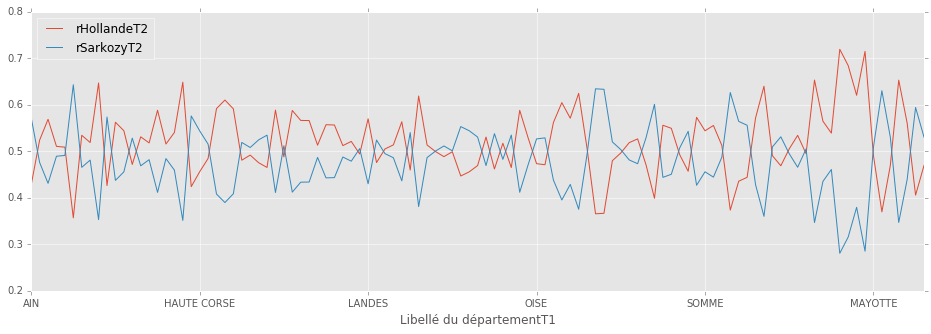

In [58]:
data.plot(x="Libellé du départementT1", y=["rHollandeT2", "rSarkozyT2"], figsize=(16,5))

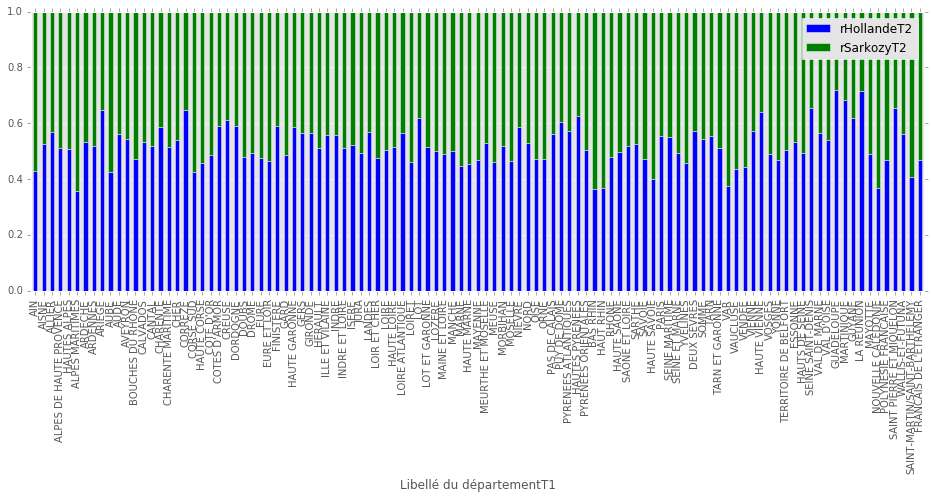

In [59]:
data.plot(x="Libellé du départementT1", y=["rHollandeT2", "rSarkozyT2"], figsize=(16,5), kind="bar", stacked=True)

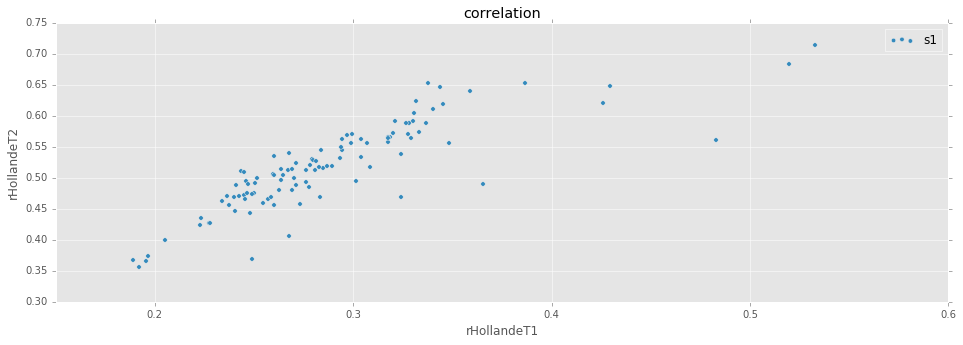

In [62]:
data.plot(x="rHollandeT1", y="rHollandeT2", figsize=(16,5), kind="scatter", label="s1", title="correlation")

### superposition

La méthode [plot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot) retourne un objet de type [Axes](http://matplotlib.org/api/axes_api.html). On peut superposer plusieurs courbes sur le même graphique en s'assurant que la seconde courbe utilise le même objet.

<class 'matplotlib.axes._subplots.AxesSubplot'>


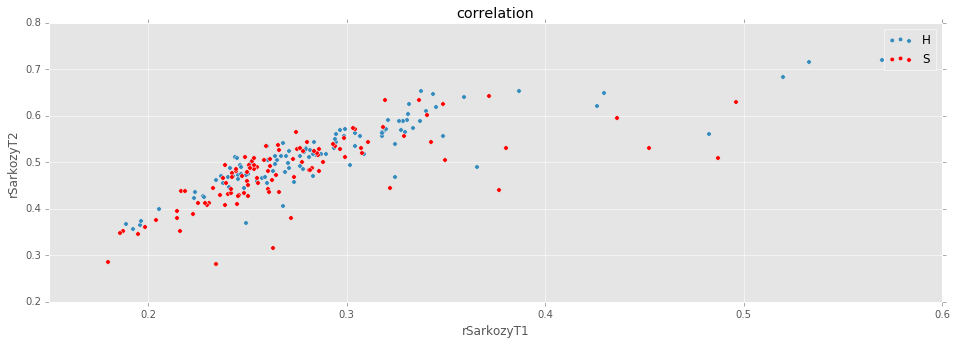

In [67]:
ax = data.plot(x="rHollandeT1", y="rHollandeT2", figsize=(16,5), kind="scatter", label="H", title="correlation")
print(type(ax))
data.plot(x="rSarkozyT1", y="rSarkozyT2", kind="scatter", label="S", ax=ax, c="red")

On ajoute une ligne avec la méthode [Axes.plot](http://matplotlib.org/api/axes_api.html?highlight=plot#matplotlib.axes.Axes.plot) ou du text avec [text](http://matplotlib.org/api/text_api.html#matplotlib.text.Text) :

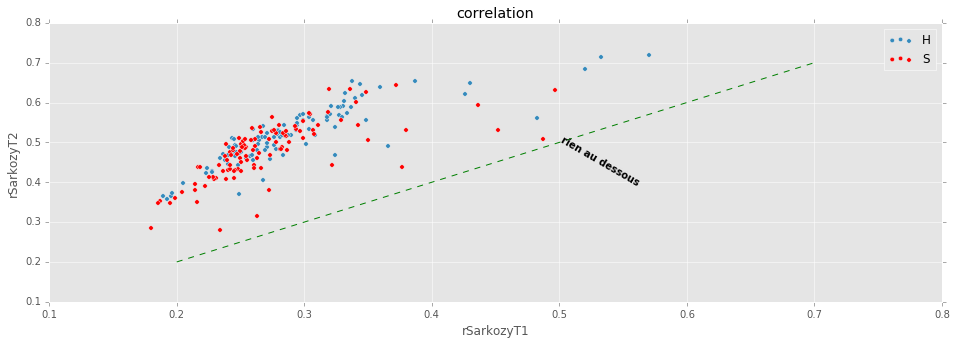

In [88]:
ax = data.plot(x="rHollandeT1", y="rHollandeT2", figsize=(16,5), kind="scatter", label="H", title="correlation")
data.plot(x="rSarkozyT1", y="rSarkozyT2", kind="scatter", label="S", ax=ax, c="red")
ax.plot([0.2,0.7], [0.2,0.7], "g--")
ax.text(0.5, 0.5, "rien au dessous", weight="bold", rotation="-30")

### plusieurs graphes sur la même figure

*pandas* crée une [Figure](http://matplotlib.org/api/pyplot_api.html?highlight=figure#matplotlib.pyplot.figure) de façon implicite avec un seul graphe. Pour créer plusieurs graphes, il faut créer ce type d'objet en précisant qu'il y aura plusieurs [Axes](http://matplotlib.org/api/axes_api.html) avec la fonction [subplots](http://matplotlib.org/api/pyplot_api.html?highlight=figure#matplotlib.pyplot.subplots) et les transmettre à *pandas*. On peut également partager l'axe des X ou l'axe des Y.

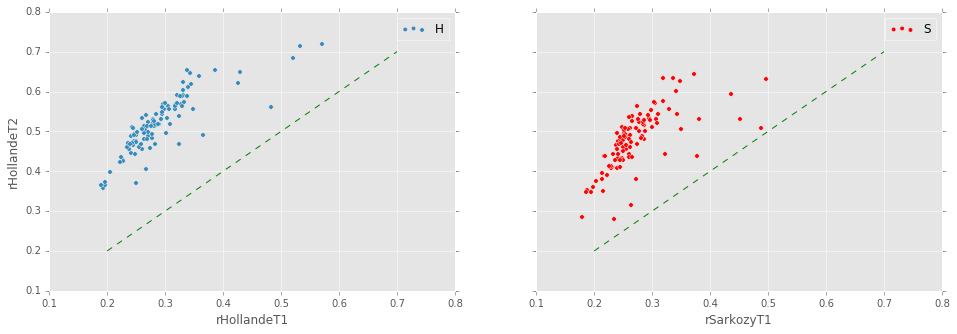

In [100]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(16,5), sharey=True)
data.plot(x="rHollandeT1", y="rHollandeT2", figsize=(16,5), kind="scatter", label="H", ax=axes[0])
data.plot(x="rSarkozyT1", y="rSarkozyT2", kind="scatter", label="S", ax=axes[1], c="red")
axes[0].plot([0.2,0.7], [0.2,0.7], "g--")
axes[1].plot([0.2,0.7], [0.2,0.7], "g--")

### matplolib sans pandas

On peut se passer de pandas et s'inspirer d'un graphe de la gallerie pour ajouter des points dépendants du nombre de votants [scatter_demo](http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html) et ajouter une légende manuellement avec la méthode [legend](http://matplotlib.org/api/axes_api.html?highlight=legend#matplotlib.axes.Axes.legend).

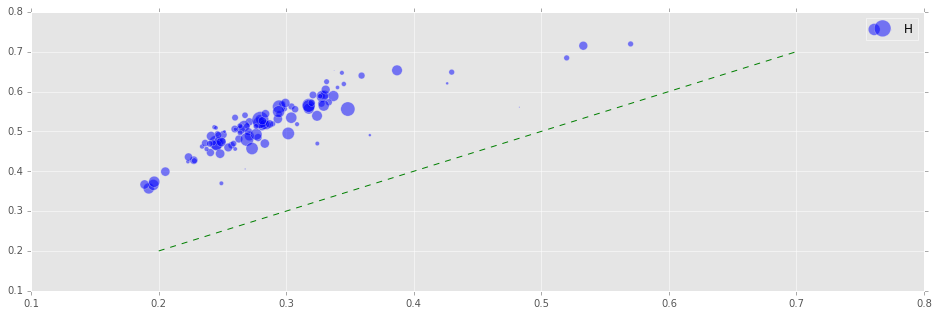

In [116]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(16,5))
c = axes.scatter(x=data["rHollandeT1"], 
            y=data["rHollandeT2"], 
            s=data["VotantsT1"]/5000, alpha=0.5)
axes.plot([0.2,0.7], [0.2,0.7], "g--")
axes.legend( (c,), ("H",) )

## Pandas et graphes prêt à l'emploi

### histogrammes

avec [hist](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html?highlight=hist#pandas.DataFrame.hist)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000015AA01D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000000163215F8>]], dtype=object)

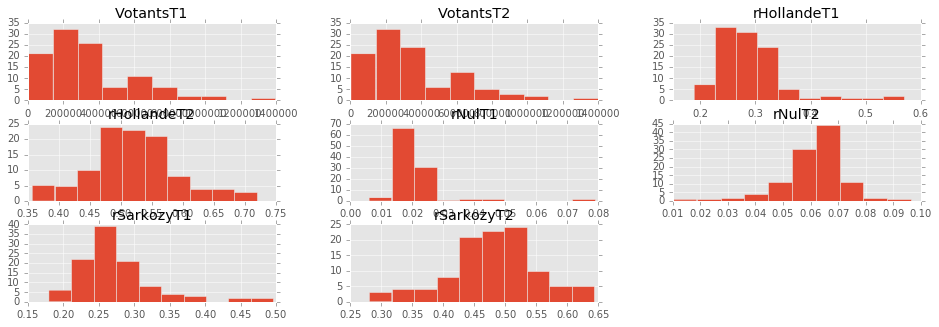

In [117]:
data.hist()

### correlation

avec [scatter_matrix](http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000197C3F28>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001B95ECC0>]], dtype=object)

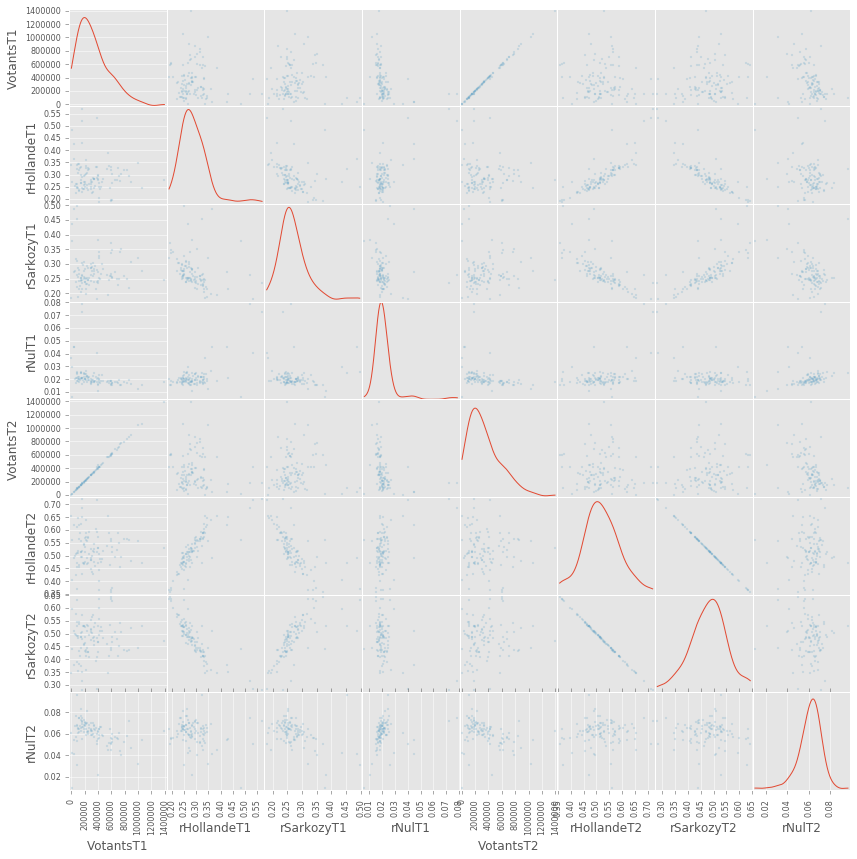

In [120]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(data, alpha=0.2, figsize=(14, 14), diagonal='kde')

## cartes

## seaborn

## bokeh

## interaction avec matplotlib

## autres options

pygal, mpld3, ggplot, folium ...